In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
 
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv', index_col=0)

In [3]:
data_X = data.ix[:, data.columns != 'imdb_rating']
data_Y = data['imdb_rating']

In [23]:
# means, stds = np.mean(data_X), np.std(data_X)
# train_data_X = (data_X-means)/stds

In [5]:
train_X,test_X = train_test_split(data_X, test_size=0.2, random_state=42)
train_y,test_y = train_test_split(data_Y, test_size=0.2, random_state=42)

In [6]:
xgb_model = xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=200, seed=42).fit(train_X, train_y)

In [7]:
predicted_test =  xgb_model.predict(test_X);
mae = mean_absolute_error(test_y, predicted_test)
print('Cередня похибка передбачення (MAE):', mae)

Cередня похибка передбачення (MAE): 0.277463349125


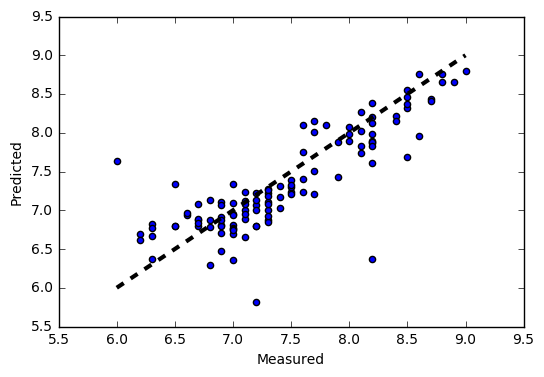

In [8]:
fig, ax = plt.subplots()
ax.scatter(test_y, predicted_test)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

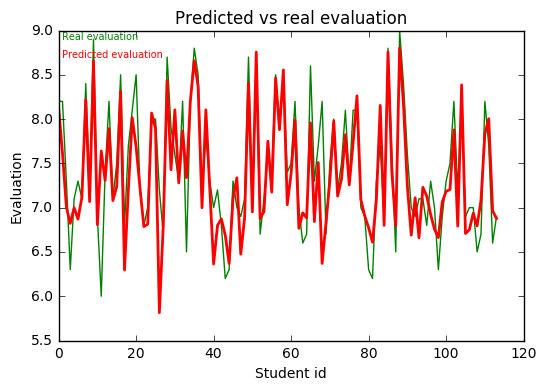

In [9]:
plt.plot(test_y.values, color="green", linewidth=1)
plt.plot(predicted_test, color="red", linewidth=2)
plt.xlabel('Student id')
plt.ylabel('Evaluation')
plt.title('Predicted vs real evaluation')
plt.text(1,8.9,'Real evaluation', color="green", fontsize=7)
plt.text(1,8.7,'Predicted evaluation', color="red", fontsize=7)
plt.show()

In [10]:
feature_importance = xgb_model.booster().get_fscore()

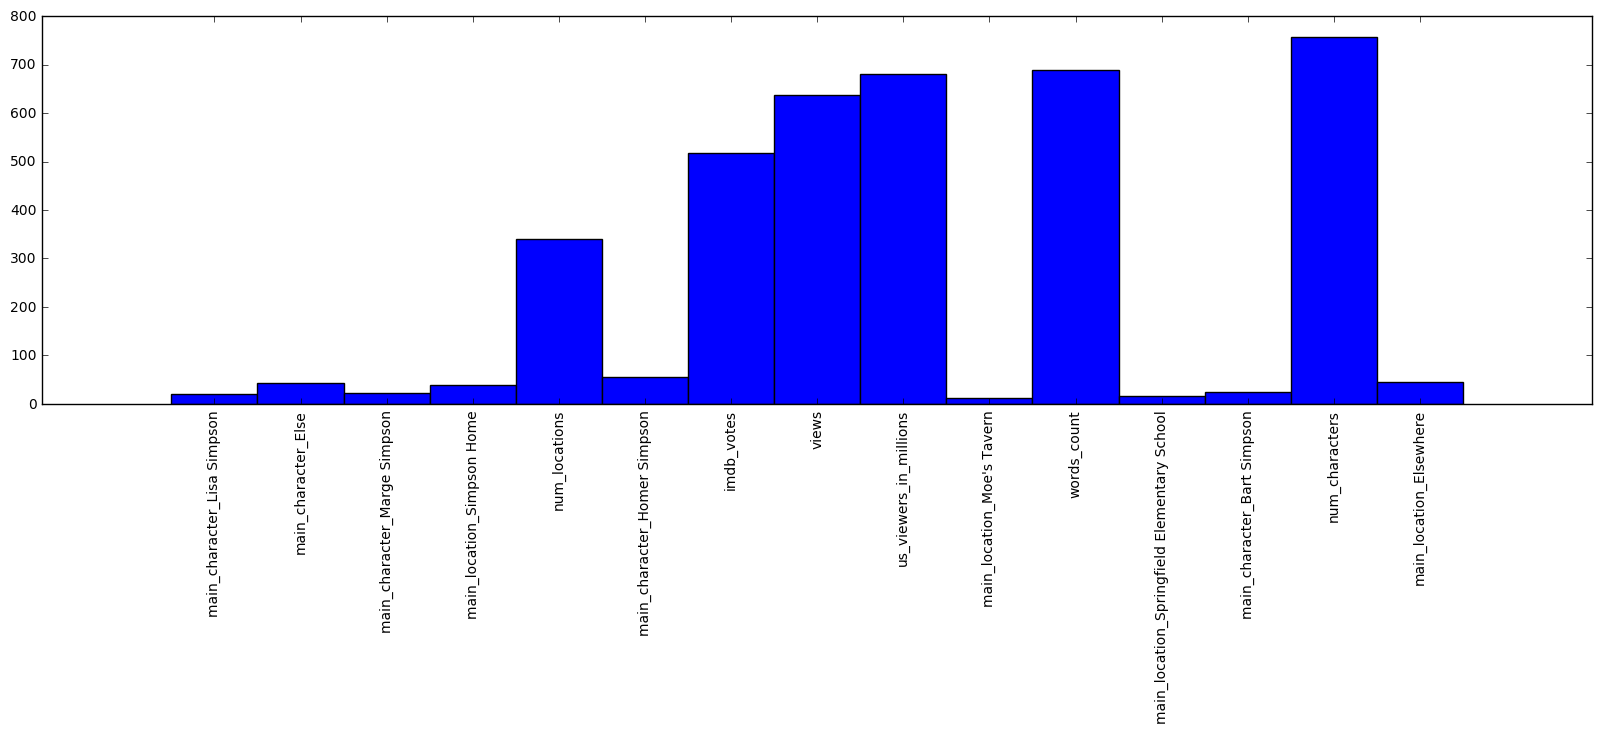

In [11]:
X = np.arange(len(feature_importance))
plt.figure(figsize=(20,5))
plt.bar(X, feature_importance.values(), align='center', width=1)
plt.xticks(X, feature_importance.keys(), rotation=90)
plt.show()

In [12]:
def train_models(trees, maes):
    for tree in trees:
        model = xgb.XGBRegressor(max_depth=4, learning_rate=0.05, n_estimators=tree, seed=42).fit(train_X, train_y)
        mae = mean_absolute_error(test_y, model.predict(test_X))
        maes.append(mae)
        print('кількість дерев:', tree, '| середня похибка передбачення:', mae)
        print('----------------------------------------------------------')

In [13]:
trees = np.arange(10, 201, 5)
maes = []
train_models(trees, maes)

кількість дерев: 10 | середня похибка передбачення: 4.19436807465
----------------------------------------------------------
кількість дерев: 15 | середня похибка передбачення: 3.264354257
----------------------------------------------------------
кількість дерев: 20 | середня похибка передбачення: 2.54471741727
----------------------------------------------------------
кількість дерев: 25 | середня похибка передбачення: 1.99083286085
----------------------------------------------------------
кількість дерев: 30 | середня похибка передбачення: 1.56607367783
----------------------------------------------------------
кількість дерев: 35 | середня похибка передбачення: 1.23814659453
----------------------------------------------------------
кількість дерев: 40 | середня похибка передбачення: 0.982505866101
----------------------------------------------------------
кількість дерев: 45 | середня похибка передбачення: 0.788776854465
----------------------------------------------------------


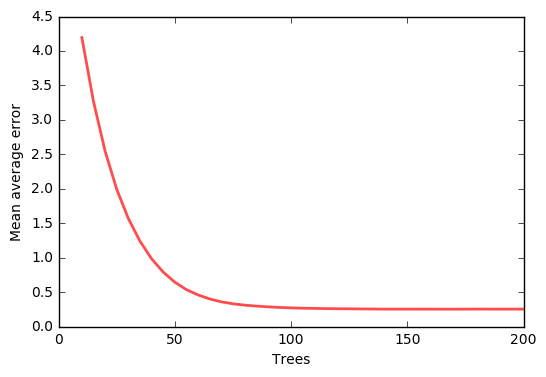

In [14]:
plt.plot(trees,maes, color="red", alpha=0.7, linewidth=2.0)
plt.ylabel('Mean average error')
plt.xlabel('Trees')
plt.show()